[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/baptiste-pasquier/data_2A/blob/main/model_NN.ipynb)

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
import sklearn
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras. import layers
import tensorflow_hub as hub

SyntaxError: ignored

In [117]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [118]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Chargement de la base Sentiment140 préprocessée 

In [144]:
NB_DATA = 50000

In [145]:
STOP_WORDS = True
LEMMATIZATION = False
NEGATION = False
file = "train"
if STOP_WORDS:
    file += "_stop"
if LEMMATIZATION:
    file += "_lemm"
if NEGATION:
    file += "_neg"
df = pd.read_pickle(os.path.join("data", "sentiment140", file + ".bz2")).sample(NB_DATA, random_state=1234)

In [146]:
df.head(10)

,sentiment,id,date,query_string,user,text
443760,Negative,2067643150,Sun Jun 07 12:42:21 PDT 2009,NO_QUERY,alwaysasidekick,yeah everyone left
1177982,Positive,1981504351,Sun May 31 09:17:33 PDT 2009,NO_QUERY,misakouroco,beautiful day love love love washington state ...
1163662,Positive,1979696545,Sun May 31 04:08:08 PDT 2009,NO_QUERY,julfree461,looking foward first day back work watching uf...
933642,Positive,1792004569,Wed May 13 21:48:36 PDT 2009,NO_QUERY,laura_wtcc,going bed night
1538716,Positive,2179949435,Mon Jun 15 09:48:19 PDT 2009,NO_QUERY,lynnnein,flylady finished closet hot pull anything toda...
855941,Positive,1573666658,Tue Apr 21 02:15:45 PDT 2009,NO_QUERY,jessikasolomon,good work going breakfast balcony
275551,Negative,1990835470,Mon Jun 01 05:51:08 PDT 2009,NO_QUERY,tweetermestupid,homeworks sigh hate tredtri professor
850269,Positive,1565396135,Mon Apr 20 06:39:22 PDT 2009,NO_QUERY,roxipid,healthy eating remember
1022805,Positive,1882874195,Fri May 22 07:37:58 PDT 2009,NO_QUERY,FelipeAzucares,would even impressed book capable ascertaining...
289349,Negative,1994988374,Mon Jun 01 12:46:27 PDT 2009,NO_QUERY,amberama,taking general donations tickets colts vs patr...


In [147]:
df['target'] = np.where(df['sentiment']=='Positive', 1, 0)
df = df[['text', 'target']]
df

,text,target
443760,yeah everyone left,0
1177982,beautiful day love love love washington state ...,1
1163662,looking foward first day back work watching uf...,1
933642,going bed night,1
1538716,flylady finished closet hot pull anything toda...,1
...,...,...
170027,arms making want cry also shots made sick,0
606276,damn songwriting class cancelled today hope ma...,0
1117280,well thank much appreciate hearing reminds sta...,1
1090071,thing happy please,1


In [148]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

a,b = train_df.copy(), test_df.copy()
X_train_text, y_train = a['text'], a['target']
X_test_text, y_test = b['text'], b['target']

# train_df, validation_df = train_test_split(train_df, test_size=0.2)
# print(len(train_df), 'train examples')
# print(len(validation_df), 'validation examples')
# print(len(test_df), 'test examples')

In [149]:
print(len(X_train_text), 'train examples')
print(len(X_test_text), 'validation examples')

40000 train examples
10000 validation examples


## CountVectorizer

In [206]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train_text)

X_train = vectorizer.transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()

In [207]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [208]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 10)                10010     
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 11        
Total params: 10,021
Trainable params: 10,021
Non-trainable params: 0
_________________________________________________________________


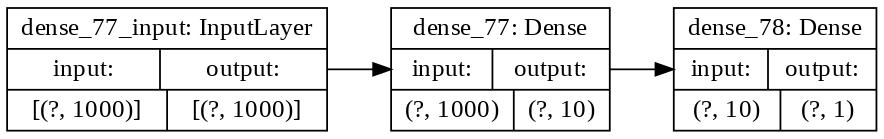

In [209]:
tf.keras.utils.plot_model(model, 
                       #to_file='model.png',
                      show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=128)

In [211]:
history = model.fit(X_train, y_train,
                    epochs=25,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=1500)

Epoch 1/25
27/27 - 0s - loss: 0.6341 - accuracy: 0.6391 - val_loss: 0.7212 - val_accuracy: 0.5025
Epoch 2/25
27/27 - 0s - loss: 0.6324 - accuracy: 0.6421 - val_loss: 0.7217 - val_accuracy: 0.5017
Epoch 3/25
27/27 - 0s - loss: 0.6306 - accuracy: 0.6444 - val_loss: 0.7227 - val_accuracy: 0.5013
Epoch 4/25
27/27 - 0s - loss: 0.6290 - accuracy: 0.6470 - val_loss: 0.7237 - val_accuracy: 0.5045
Epoch 5/25
27/27 - 0s - loss: 0.6273 - accuracy: 0.6481 - val_loss: 0.7244 - val_accuracy: 0.5028
Epoch 6/25
27/27 - 0s - loss: 0.6256 - accuracy: 0.6497 - val_loss: 0.7255 - val_accuracy: 0.5022
Epoch 7/25
27/27 - 0s - loss: 0.6239 - accuracy: 0.6518 - val_loss: 0.7267 - val_accuracy: 0.5014
Epoch 8/25
27/27 - 0s - loss: 0.6223 - accuracy: 0.6538 - val_loss: 0.7272 - val_accuracy: 0.5026
Epoch 9/25
27/27 - 0s - loss: 0.6207 - accuracy: 0.6536 - val_loss: 0.7284 - val_accuracy: 0.5014
Epoch 10/25
27/27 - 0s - loss: 0.6191 - accuracy: 0.6560 - val_loss: 0.7294 - val_accuracy: 0.5011
Epoch 11/25
27/27 -

In [212]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print(f"Training accuracy: {accuracy:.4f}, traning loss: {loss:.4f}")
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Testing accuracy:  {accuracy:.4f}, test loss:    {loss:.4f}")

Training accuracy: 0.6803, traning loss: 0.5929
Testing accuracy:  0.5032, test loss:    0.7472


In [213]:
def plot_history(history):
  pd.DataFrame(history.history).plot(figsize=(10,10))
  plt.grid(True)
  plt.show()

In [214]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
    ax[0].plot(x, acc, 'b', label='Training acc')
    ax[0].plot(x, val_acc, 'r', label='Validation acc')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()

    ax[1].plot(x, loss, 'b', label='Training loss')
    ax[1].plot(x, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()

    plt.show()

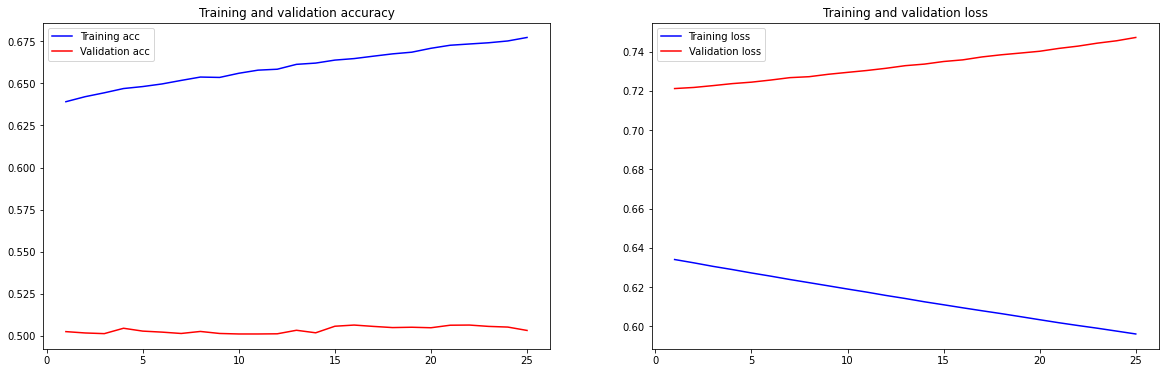

In [215]:
plot_history(history)

In [216]:
from sklearn.model_selection import train_test_split             
from keras.preprocessing.text import Tokenizer                    
from keras.preprocessing.sequence import pad_sequences

sentences = df['text'].values
y = df['target'].values

sentences_train,sentences_test,y_train,y_test = train_test_split(
                                                sentences, y,  
                                                test_size=0.2,  
                                                random_state=1234)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_text)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1                          

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [217]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                                        vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [218]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix('data/glove.6B/glove.6B.100d.txt',
                                            tokenizer.word_index,  
                                            embedding_dim)
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.19103999,  0.17601   ,  0.36919999, ..., -0.59680003,
         0.080843  ,  0.27866   ],
       [-0.030769  ,  0.11993   ,  0.53908998, ..., -0.52877998,
         0.17584001,  1.06500006],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.86255997, -0.40669   ,  0.12895   , ...,  0.23293   ,
        -0.63455999, -0.40970001],
       [ 0.15424   , -0.31988999,  0.10068   , ..., -0.54917002,
        -0.36276001, -0.81550002]])

In [219]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.7212016137098657

In [220]:
from keras.models import Sequential
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=True))
model.add(layers.Conv1D(128, 5, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/50
 793/4000 [====>.........................] - ETA: 1:34 - loss: 0.6902 - accuracy: 0.5084

KeyboardInterrupt: ignored

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1500)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# TF Hub

In [52]:
train_data = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['target'].values))
validation_data = tf.data.Dataset.from_tensor_slices((validation_df['text'].values, validation_df['target'].values))
test_data = tf.data.Dataset.from_tensor_slices((test_df['text'].values, test_df['target'].values))

In [53]:
train_data

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [54]:
for feat, targ in train_data.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: b'twitting mobile addicted', Target: 1
Features: b'hope mom fine aww want relax play druid hehe', Target: 0
Features: b'still questions left fml', Target: 0
Features: b'dad wants take dog pound', Target: 0
Features: b'good sweetie keep doin thing', Target: 1


In [55]:
train_text_batch, train_target_batch = next(iter(train_data.batch(10)))
train_text_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'twitting mobile addicted',
       b'hope mom fine aww want relax play druid hehe',
       b'still questions left fml', b'dad wants take dog pound',
       b'good sweetie keep doin thing', b'thaanku thaanku',
       b'home free today kicked butt utterly exhausted got sign contracts upcoming photoshoots though not_rest weary',
       b'btw working project portugu support pt br one',
       b'visiting grandparents later btw heard katy perry hook whew cool love k clarkson version',
       b'fast'], dtype=object)>

In [56]:
train_target_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0])>

In [57]:
MODEL = "nnlm-en-dim128"
VERSION = 2
URL = "https://tfhub.dev/google/"+MODEL+"/"+str(VERSION)
print (URL)

https://tfhub.dev/google/nnlm-en-dim128/2


In [58]:
hub_layer = hub.KerasLayer(URL, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [59]:
hub_layer(train_text_batch[:2])

<tf.Tensor: shape=(2, 128), dtype=float32, numpy=
array([[ 0.00546283, -0.00561204, -0.0785405 , -0.04637135,  0.06215012,
        -0.04920826, -0.09905956, -0.07922285, -0.15964004, -0.01552058,
        -0.02536542, -0.1737811 , -0.02335694,  0.14140925, -0.02421658,
         0.00094145, -0.10317975, -0.16319756,  0.0090157 , -0.01289415,
         0.03463088,  0.00631191,  0.18819357,  0.01612905, -0.00048548,
        -0.0967177 ,  0.1567044 ,  0.0569925 , -0.09797714,  0.02040993,
         0.07546967,  0.06831526, -0.14567627,  0.00098766, -0.0235068 ,
         0.01196632, -0.17071965,  0.04303248,  0.20676106,  0.08563537,
        -0.03677293,  0.06135437,  0.04796109,  0.04852755,  0.06069587,
        -0.03539995,  0.03356227, -0.05708538,  0.13243859,  0.24829407,
        -0.23051344, -0.09127854,  0.08265077, -0.02114734, -0.05668553,
        -0.05777658,  0.12898083,  0.00382201, -0.09021141, -0.03239587,
         0.03734132,  0.1160709 ,  0.11467358,  0.06978903,  0.17585969,
 

In [60]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_11 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 124,644,769
Trainable params: 124,644,769
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.get_weights()

[array([[ 8.16051960e-01,  3.51142138e-02, -3.23012704e-03, ...,
         -2.68346369e-02, -4.95113060e-02,  1.63635537e-02],
        [ 6.26858950e-01,  1.22697828e-02, -5.47063090e-02, ...,
          7.37033179e-03, -7.09955022e-02, -7.38640875e-02],
        [-1.19781224e-02, -4.65284288e-02, -4.78441420e-04, ...,
          1.27587229e-01,  1.21942766e-01, -3.41316722e-02],
        ...,
        [-1.96687713e-01,  1.08706986e-03, -8.78152475e-02, ...,
          1.77201703e-01, -1.04697749e-01,  4.37770933e-02],
        [-2.06271142e-01, -2.30716169e-02, -7.13550597e-02, ...,
         -3.06905657e-02, -1.14739329e-01, -5.64496219e-02],
        [-1.38024807e-01, -1.27754761e-02, -6.36914894e-02, ...,
          1.03301600e-01,  6.30483963e-04, -4.08159662e-03]], dtype=float32),
 array([[ 0.15781376, -0.15692355, -0.15510471, ...,  0.09702197,
         -0.14595747,  0.05313215],
        [-0.05704121, -0.05676854,  0.1758537 , ..., -0.17187501,
         -0.10743326,  0.18461585],
        [-

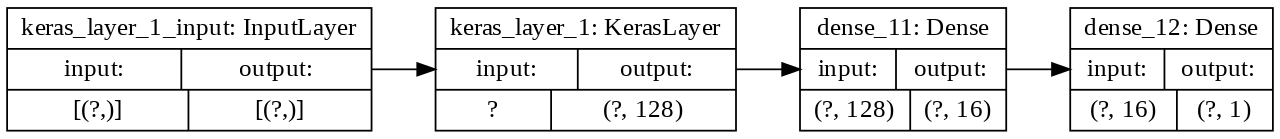

In [62]:
tf.keras.utils.plot_model(model, 
                       #to_file='model.png',
                      show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=128)

Epoch 1/10
64/64 [==============================] - 5s 72ms/step - loss: 0.6368 - accuracy: 0.5479 - val_loss: 0.5467 - val_accuracy: 0.6771
Epoch 2/10
64/64 [==============================] - 4s 70ms/step - loss: 0.4690 - accuracy: 0.7594 - val_loss: 0.4910 - val_accuracy: 0.7460
Epoch 3/10
64/64 [==============================] - 4s 70ms/step - loss: 0.3806 - accuracy: 0.8255 - val_loss: 0.5131 - val_accuracy: 0.7479
Epoch 4/10
64/64 [==============================] - 4s 70ms/step - loss: 0.3243 - accuracy: 0.8588 - val_loss: 0.5605 - val_accuracy: 0.7372
Epoch 5/10
64/64 [==============================] - 5s 71ms/step - loss: 0.2838 - accuracy: 0.8806 - val_loss: 0.6173 - val_accuracy: 0.7312
Epoch 6/10
64/64 [==============================] - 4s 70ms/step - loss: 0.2546 - accuracy: 0.8941 - val_loss: 0.6741 - val_accuracy: 0.7264
Epoch 7/10
64/64 [==============================] - 4s 70ms/step - loss: 0.2320 - accuracy: 0.9048 - val_loss: 0.7306 - val_accuracy: 0.7211
Epoch 8/10
64

[0.8404902219772339, 0.72079998254776]

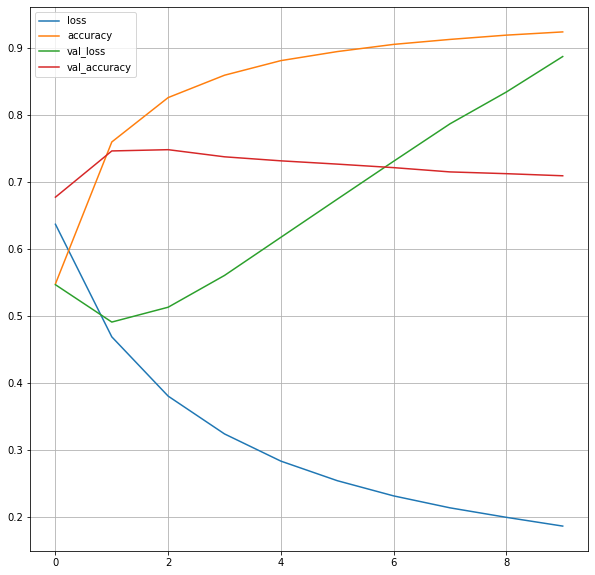

In [63]:
history = model.fit(train_data.shuffle(10000).batch(500), 
                    epochs=10,
                    validation_data=validation_data.batch(500),
                    verbose=1)
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.show
model.evaluate(X_test, y_test, verbose=2)

In [64]:
def reset_weights(model):
    for layer in model.layers: 
        if isinstance(layer, tf.keras.Model):
            reset_weights(layer)
            continue
        for k, initializer in layer.__dict__.items():
            if "initializer" not in k:
                continue
            # find the corresponding variable
            var = getattr(layer, k.replace("_initializer", ""))
            var.assign(initializer(var.shape, var.dtype))
reset_weights(model)
model.get_weights()

[array([[ 8.16051960e-01,  3.51142138e-02, -3.23012704e-03, ...,
         -2.68346369e-02, -4.95113060e-02,  1.63635537e-02],
        [ 6.26858950e-01,  1.22697828e-02, -5.47063090e-02, ...,
          7.37033179e-03, -7.09955022e-02, -7.38640875e-02],
        [-1.19781224e-02, -4.65284288e-02, -4.78441420e-04, ...,
          1.27587229e-01,  1.21942766e-01, -3.41316722e-02],
        ...,
        [-1.92118108e-01,  1.33892549e-02, -1.15510851e-01, ...,
          1.68337986e-01, -3.35453562e-02,  4.63400073e-02],
        [-1.59823671e-01,  3.79276797e-02, -3.14410329e-02, ...,
          2.44692694e-02, -5.63509203e-02, -4.86949179e-03],
        [-1.38024807e-01, -1.27754761e-02, -6.36914894e-02, ...,
          1.03301600e-01,  6.30483963e-04, -4.08159662e-03]], dtype=float32),
 array([[-0.09302374,  0.04627171,  0.16296273, ...,  0.00617521,
          0.17044449,  0.18358847],
        [ 0.08733156,  0.09008312, -0.19267792, ..., -0.03356864,
         -0.1550758 , -0.04345097],
        [ 

Epoch 1/15
7/7 [==============================] - 1s 80ms/step - loss: 0.6622 - accuracy: 0.5093 - val_loss: 0.6304 - val_accuracy: 0.5343
Epoch 2/15
7/7 [==============================] - 1s 76ms/step - loss: 0.5996 - accuracy: 0.5889 - val_loss: 0.5568 - val_accuracy: 0.6791
Epoch 3/15
7/7 [==============================] - 1s 76ms/step - loss: 0.5195 - accuracy: 0.7382 - val_loss: 0.4808 - val_accuracy: 0.7912
Epoch 4/15
7/7 [==============================] - 1s 76ms/step - loss: 0.4426 - accuracy: 0.8171 - val_loss: 0.4167 - val_accuracy: 0.8366
Epoch 5/15
7/7 [==============================] - 1s 78ms/step - loss: 0.3795 - accuracy: 0.8514 - val_loss: 0.3707 - val_accuracy: 0.8516
Epoch 6/15
7/7 [==============================] - 1s 77ms/step - loss: 0.3336 - accuracy: 0.8670 - val_loss: 0.3423 - val_accuracy: 0.8596
Epoch 7/15
7/7 [==============================] - 1s 75ms/step - loss: 0.3029 - accuracy: 0.8769 - val_loss: 0.3271 - val_accuracy: 0.8648
Epoch 8/15
7/7 [===========

[0.670096755027771, 0.7279000282287598]

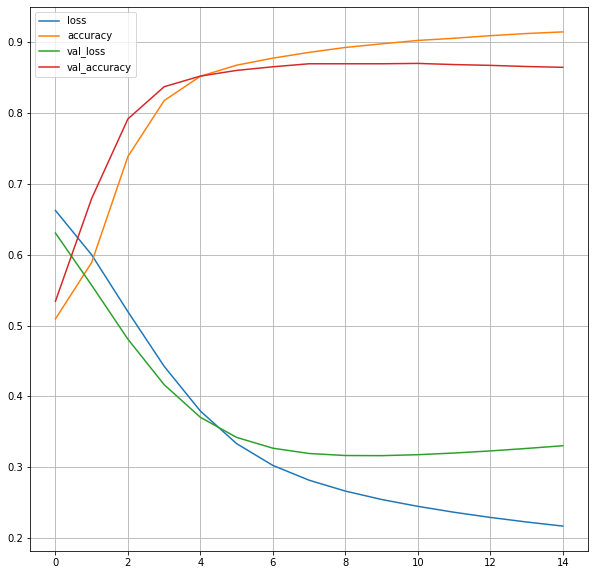

In [65]:
reset_weights(model)
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=5000,
                    validation_split=0.2,
                    verbose=1)
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.show
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/15
32/32 [==============================] - 0s 10ms/step - loss: 0.6892 - accuracy: 0.5462 - val_loss: 0.6790 - val_accuracy: 0.6214
Epoch 2/15
32/32 [==============================] - 0s 7ms/step - loss: 0.6626 - accuracy: 0.6731 - val_loss: 0.6465 - val_accuracy: 0.6814
Epoch 3/15
32/32 [==============================] - 0s 7ms/step - loss: 0.6247 - accuracy: 0.7132 - val_loss: 0.6079 - val_accuracy: 0.7149
Epoch 4/15
32/32 [==============================] - 0s 7ms/step - loss: 0.5869 - accuracy: 0.7323 - val_loss: 0.5752 - val_accuracy: 0.7265
Epoch 5/15
32/32 [==============================] - 0s 7ms/step - loss: 0.5573 - accuracy: 0.7403 - val_loss: 0.5529 - val_accuracy: 0.7337
Epoch 6/15
32/32 [==============================] - 0s 7ms/step - loss: 0.5372 - accuracy: 0.7464 - val_loss: 0.5378 - val_accuracy: 0.7364
Epoch 7/15
32/32 [==============================] - 0s 7ms/step - loss: 0.5239 - accuracy: 0.7493 - val_loss: 0.5289 - val_accuracy: 0.7409
Epoch 8/15
32/32 [=

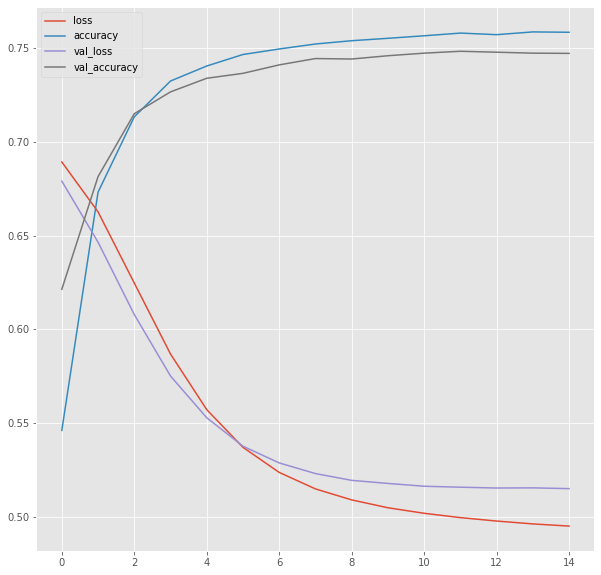

313/313 - 1s - loss: 0.5182 - accuracy: 0.7407


[0.5182135701179504, 0.7407000064849854]

In [130]:
reset_weights(model)
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=1000,
                    validation_split=0.2,
                    verbose=1)
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.show()
model.evaluate(X_test, y_test, verbose=2)